<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/q28a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

In [0]:
x_latent = np.linspace(-10, 10, 100)

In [0]:
import numpy as np
def get_coeff_by_least_squares_method(X, Y, d=1):
    X_pre = np.ones(X.size)
    Phi_b = [X_pre]
    for i in range(d):
        X_pre = X * X_pre
        Phi_b.append(X_pre)
    Phi = np.matrix(Phi_b).T 
    W = np.dot(np.linalg.inv(Phi.T * Phi) * Phi.T,Y)
    return W.A1

In [4]:
w = get_coeff_by_least_squares_method(np.array(x_observed), np.array(f(x_observed)), 9)
w

array([ 5.00000000e-01,  2.27620234e-01, -2.68673972e-14, -1.03778293e-02,
        1.30537942e-16,  2.81700740e-04, -2.98833224e-18, -3.45995672e-06,
        1.85288457e-20,  1.50310748e-08])

In [0]:
def predict_y_from_polynomial(x):
    y=0
    for i in range(len(w)):
        y += pow(x, i) * w[i]
    return y

In [6]:
y = predict_y_from_polynomial(x_latent)
y

array([ 4.53978896e-05,  7.85492754e-02,  1.18091301e-01,  1.30275068e-01,
        1.24274028e-01,  1.07200580e-01,  8.44350370e-02,  5.99174474e-02,
        3.64051539e-02,  1.56987887e-02, -1.16069698e-03, -1.37215128e-02,
       -2.19746890e-02, -2.62297075e-02, -2.70100194e-02, -2.49664793e-02,
       -2.08068424e-02, -1.52395825e-02, -8.93039728e-03, -2.46987147e-03,
        3.64912759e-03,  9.04564816e-03,  1.34576772e-02,  1.67431249e-02,
        1.88758179e-02,  1.99374610e-02,  2.01064423e-02,  1.96442781e-02,
        1.88804123e-02,  1.81960138e-02,  1.80073414e-02,  1.87491764e-02,
        2.08587606e-02,  2.47606101e-02,  3.08525201e-02,  3.94930157e-02,
        5.09904535e-02,  6.55939251e-02,  8.34860696e-02,  1.04777854e-01,
        1.29505343e-01,  1.57628440e-01,  1.89031542e-01,  2.23526029e-01,
        2.60854467e-01,  3.00696387e-01,  3.42675475e-01,  3.86367995e-01,
        4.31312231e-01,  4.77018750e-01,  5.22981250e-01,  5.68687769e-01,
        6.13632005e-01,  

In [0]:
def LSM(X, Y, d=1):
    def get_coeff_by_least_squares_method(X, Y, d=1):
        X_pre = np.ones(X.size)
        Phi_b = [X_pre]
        for i in range(d):
            X_pre = X * X_pre
            Phi_b.append(X_pre)
        Phi = np.matrix(Phi_b).T 
        W = np.dot(np.linalg.inv(Phi.T * Phi) * Phi.T,Y)
        return W.A1

    def predict_y_from_polynomial(x):
        y=0
        for i in range(len(w)):
            y += pow(x, i) * w[i]
        return y
    
    w = get_coeff_by_least_squares_method(X, Y, d)
    return predict_y_from_polynomial

In [8]:
fitted_curve = LSM(np.array(x_observed), np.array(f(x_observed)), 9)
fitted_curve

<function __main__.LSM.<locals>.predict_y_from_polynomial>

In [9]:
fitted_curve(x_latent)

array([ 4.53978896e-05,  7.85492754e-02,  1.18091301e-01,  1.30275068e-01,
        1.24274028e-01,  1.07200580e-01,  8.44350370e-02,  5.99174474e-02,
        3.64051539e-02,  1.56987887e-02, -1.16069698e-03, -1.37215128e-02,
       -2.19746890e-02, -2.62297075e-02, -2.70100194e-02, -2.49664793e-02,
       -2.08068424e-02, -1.52395825e-02, -8.93039728e-03, -2.46987147e-03,
        3.64912759e-03,  9.04564816e-03,  1.34576772e-02,  1.67431249e-02,
        1.88758179e-02,  1.99374610e-02,  2.01064423e-02,  1.96442781e-02,
        1.88804123e-02,  1.81960138e-02,  1.80073414e-02,  1.87491764e-02,
        2.08587606e-02,  2.47606101e-02,  3.08525201e-02,  3.94930157e-02,
        5.09904535e-02,  6.55939251e-02,  8.34860696e-02,  1.04777854e-01,
        1.29505343e-01,  1.57628440e-01,  1.89031542e-01,  2.23526029e-01,
        2.60854467e-01,  3.00696387e-01,  3.42675475e-01,  3.86367995e-01,
        4.31312231e-01,  4.77018750e-01,  5.22981250e-01,  5.68687769e-01,
        6.13632005e-01,  

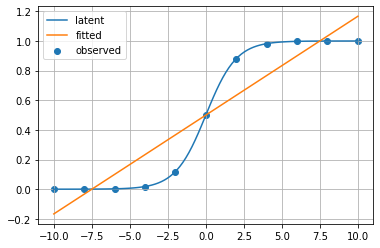

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fitted_curve = LSM(x_observed, f(x_observed))
plt.scatter(x_observed, f(x_observed), label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
plt.grid()
plt.legend()
plt.show()

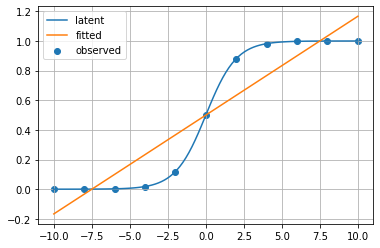

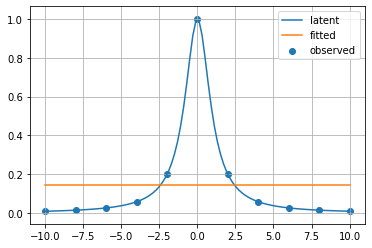

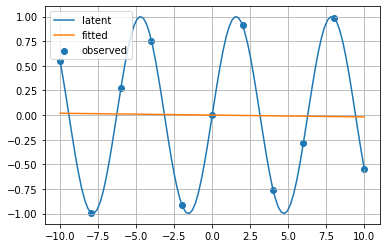

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# 線形近似
for func in [f, g, h]:
    fitted_curve = LSM(x_observed, func(x_observed))
    plt.scatter(x_observed, func(x_observed), label="observed")
    plt.plot(x_latent, func(x_latent), label="latent")
    plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
    plt.grid()
    plt.legend()
    plt.show()

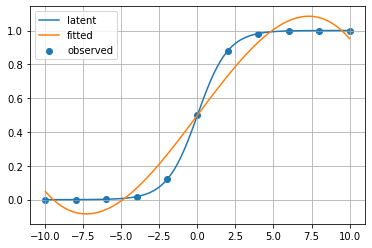

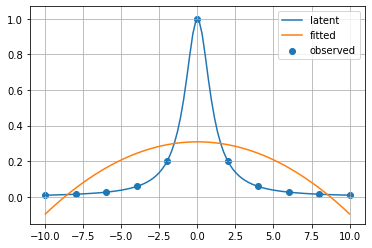

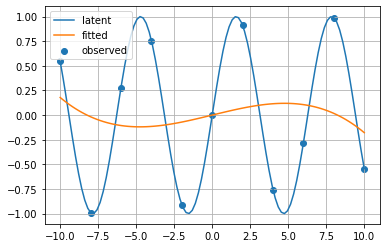

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

d = 3 # ３次式に近似
for func in [f, g, h]:
    fitted_curve = LSM(x_observed, func(x_observed), d=d)
    plt.scatter(x_observed, func(x_observed), label="observed")
    plt.plot(x_latent, func(x_latent), label="latent")
    plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
    plt.grid()
    plt.legend()
    plt.show()

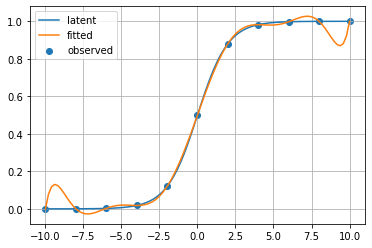

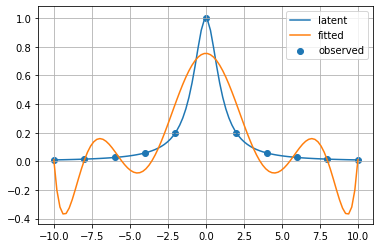

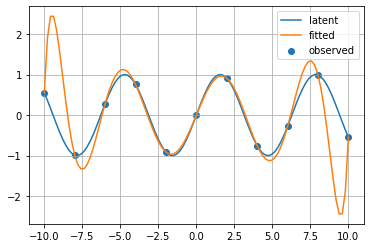

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

d = 9 # 9次式に近似
for func in [f, g, h]:
    fitted_curve = LSM(x_observed, func(x_observed), d=d)
    plt.scatter(x_observed, func(x_observed), label="observed")
    plt.plot(x_latent, func(x_latent), label="latent")
    plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
    plt.grid()
    plt.legend()
    plt.show()